# Sklearn


The purpose of this notebook is to get you familair with the sklearn API for clustering.



** 1. ** Apply each Hierarachical, Kmeans and DBSCAN to the bellow dataset.

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [191]:
X1, y1 = make_blobs(n_samples=1000, centers=5, n_features=2,cluster_std = 0.7 , random_state=0)
X2, y2 = make_moons(n_samples =1000,noise=0.1)
X3, y3 = make_circles(1000,noise=0.01)

In [192]:
X2

array([[ 1.60970683, -0.00595174],
       [ 0.14352066,  1.03280882],
       [ 0.0612262 ,  0.33676268],
       ...,
       [ 0.77510263,  0.83222728],
       [-0.01011389,  0.09144068],
       [-0.8009248 ,  0.72558175]])

In [193]:
list(enumerate([X1,X2,X3]))

[(0, array([[-0.86842823,  8.33661724],
         [-1.15664348,  3.09018571],
         [ 2.59525169,  1.61827084],
         ...,
         [-1.17183675,  2.83652147],
         [-1.63290476,  7.06646051],
         [10.1201503 , -3.31544296]])), (1, array([[ 1.60970683, -0.00595174],
         [ 0.14352066,  1.03280882],
         [ 0.0612262 ,  0.33676268],
         ...,
         [ 0.77510263,  0.83222728],
         [-0.01011389,  0.09144068],
         [-0.8009248 ,  0.72558175]])), (2, array([[-0.2465877 , -0.76350134],
         [-0.56289959, -0.82109919],
         [-0.53852492, -0.59216555],
         ...,
         [-0.4599054 , -0.63749145],
         [ 0.69859166,  0.3698623 ],
         [ 0.59287281,  0.54840709]]))]

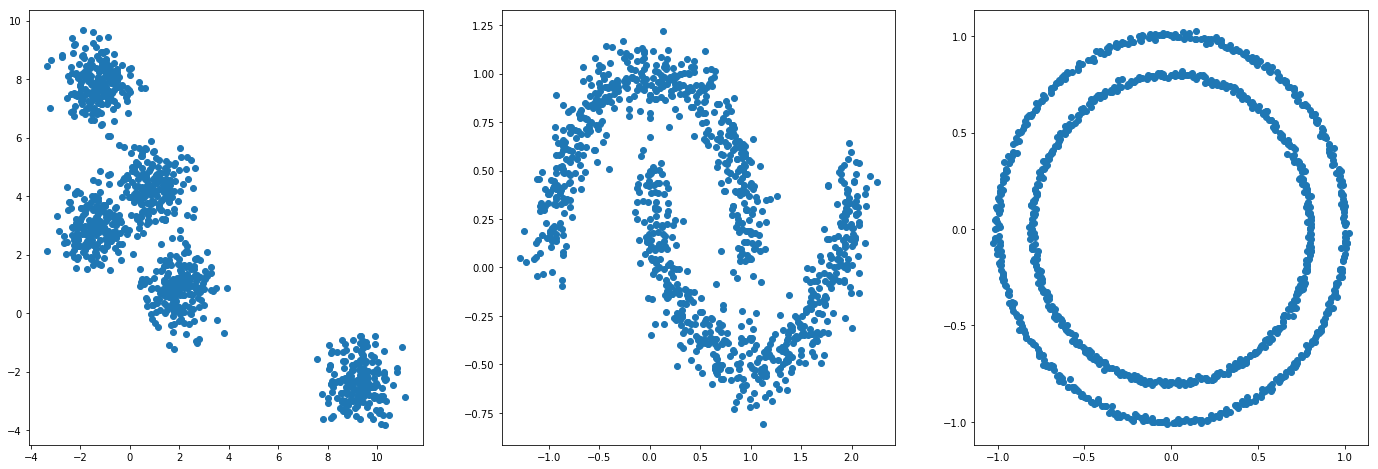

In [194]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

for i,X in enumerate([X1,X2,X3]):
    axes[i].scatter(X[:,0],X[:,1])

** 2. ** In each case evalualte how we'll each clustering methods did using accuracy?

** 3. ** For each case which algorithm did best? Can you expalin why?

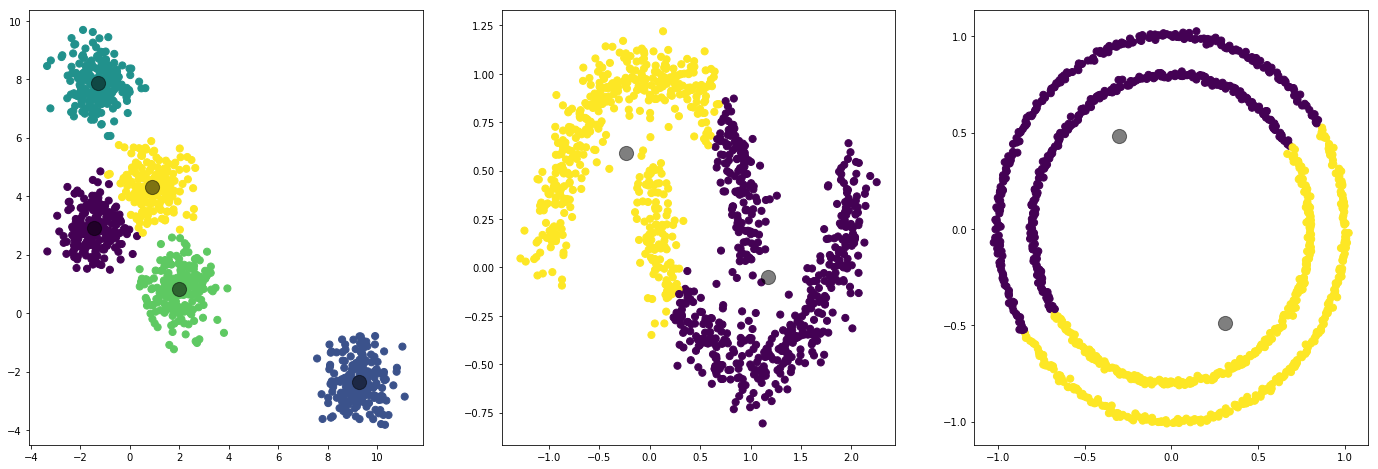

In [195]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1,3,figsize=(24,8))

kmeans = KMeans(n_clusters=5)
# kmeans.fit(X1)

y_kmeans = kmeans.fit_predict(X1)

axes[0].scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)

y_kmeans = kmeans.predict(X2)

axes[1].scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
axes[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

kmeans = KMeans(n_clusters=2)
kmeans.fit(X3)

y_kmeans = kmeans.predict(X3)

axes[2].scatter(X3[:, 0], X3[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
axes[2].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

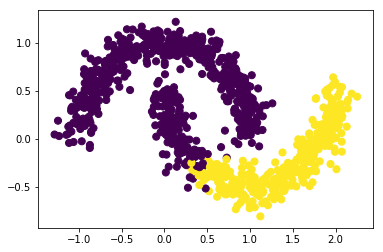

In [196]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=labels,
            s=50, cmap='viridis');

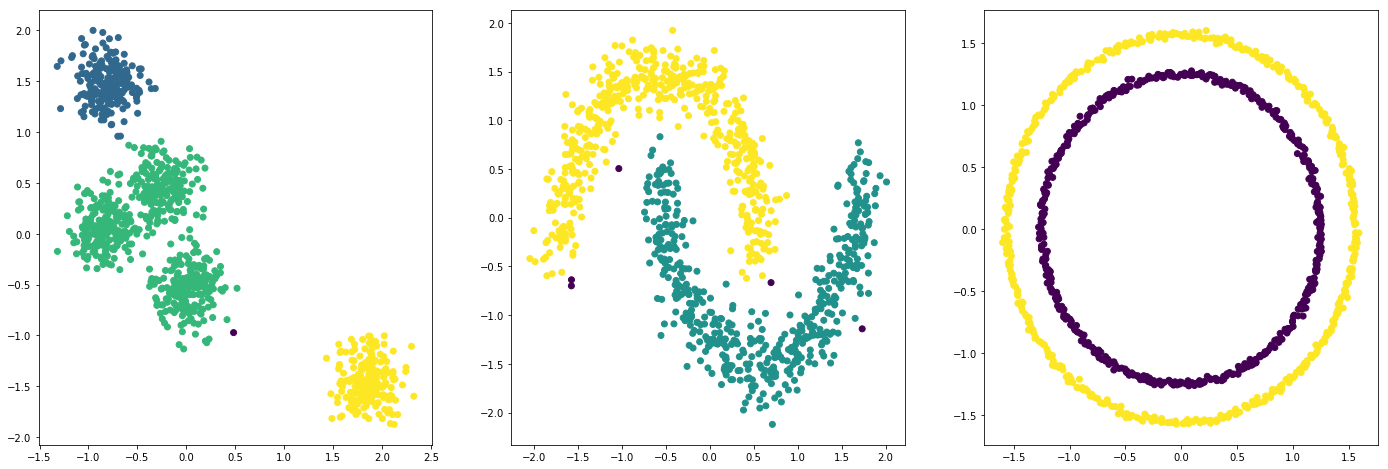

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

fig, axes = plt.subplots(1,3,figsize=(24,8))

X1 = StandardScaler().fit_transform(X1)
y_pred = DBSCAN(eps=0.23, min_samples=10).fit_predict(X1)
axes[0].scatter(X1[:,0], X1[:,1], c=y_pred)

X2 = StandardScaler().fit_transform(X2)
y_pred = DBSCAN(eps=0.23, min_samples=10).fit_predict(X2)
axes[1].scatter(X2[:,0], X2[:,1], c=y_pred)

""" plt.plot(X2[y_pred == 0, 0], X2[y_pred == 0, 1], 'ro')
plt.plot(X2[y_pred == 1, 0], X2[y_pred == 1, 1], 'go') """

X3 = StandardScaler().fit_transform(X3)
y_pred = DBSCAN(eps=0.23, min_samples=10).fit_predict(X3)
axes[2].scatter(X3[:,0], X3[:,1], c=y_pred)



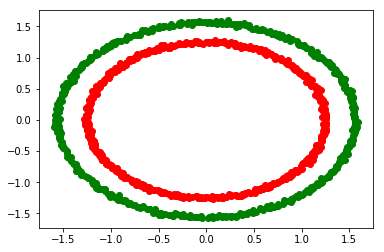

In [198]:
X3 = StandardScaler().fit_transform(X3)
y_pred = DBSCAN(eps=0.2, min_samples=10).fit_predict(X3)

plt.plot(X3[y_pred == 0, 0], X3[y_pred == 0, 1], 'ro')
plt.plot(X3[y_pred == 1, 0], X3[y_pred == 1, 1], 'go')

** 4. ** Pick one algorithm and tweak it's parameters, can you improve the accuracy?

# Colour Compresion


A intresting application of clustering is colour compression. We can use k-means to cluster the pixels by there colour. After clustering we take the centroid, which will be the average of all of the pixels colour in a cluster, and use that as our new colour.

In [199]:
from sklearn.datasets import load_sample_image

In [221]:
import matplotlib.image as mpimg

C:\Users\edwin\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\edwin\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


(-0.5, 639.5, 426.5, -0.5)

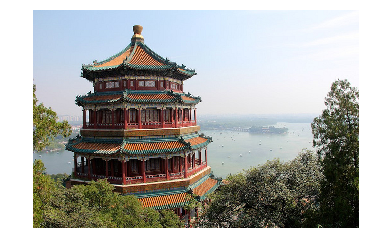

In [222]:
img = load_sample_image('china.jpg')
img = img / 255 # scale values
plt.imshow(img)
plt.axis('off')

** 1. ** Reshape the image to ((height * width ), n_channels).

In [223]:
img.shape

(427, 640, 3)

In [224]:
data = img.reshape(427 * 640, 3)
data.shape

(273280, 3)

** 2. ** Fit kmeans on the model and predict what cluster each pixel is in.

In [225]:
kmeans = KMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [226]:
new_colors

array([[0.75122717, 0.83981778, 0.93999946],
       [0.75122717, 0.83981778, 0.93999946],
       [0.75122717, 0.83981778, 0.93999946],
       ...,
       [0.1563087 , 0.13275774, 0.09687424],
       [0.05576963, 0.05170666, 0.02895215],
       [0.05576963, 0.05170666, 0.02895215]])

In [227]:
img_new = new_colors.reshape(img.shape)

img_new.shape

(427, 640, 3)

** 3. ** What is the shape of the clusters cluster centers, and why is it this shape? What do the centroids represent ?

We can use our prediction to index into 

In [228]:
# img_new = kmeans.cluster_centers_[y_pred]

** 5. ** Reshape the image back to it's original size and plot it.

(-0.5, 639.5, 426.5, -0.5)

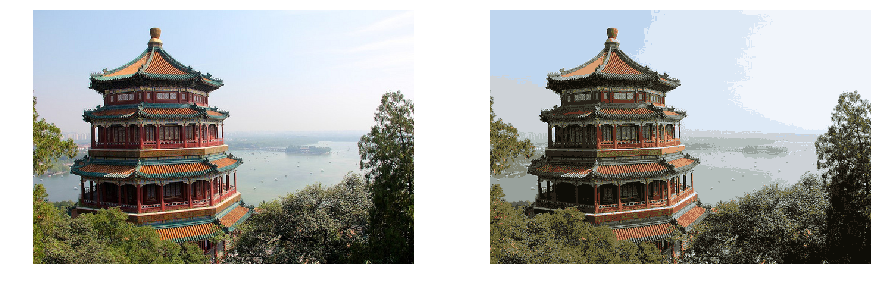

In [229]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(img_new)
axes[0].axis('off')
axes[1].axis('off')